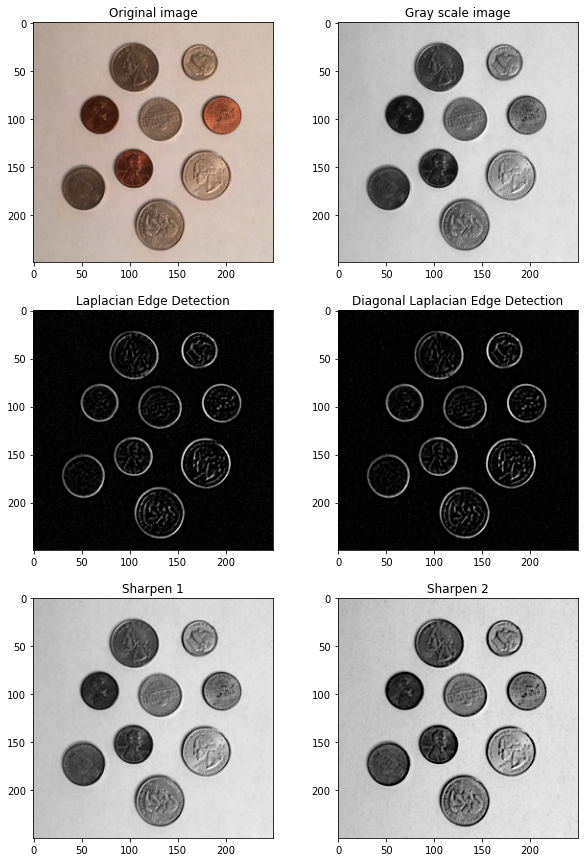

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),0)

#Laplacian Operation for edge detection (convolution)
kernel1 = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32)

kernel2 = np.array([[1, 1, 1],
                    [1, -8, 1],
                    [1, 1, 1]], dtype=np.float32)
ImageLap1 = cv2.filter2D(blurred, cv2.CV_32F, kernel1)
ImageLap2 = cv2.filter2D(blurred, cv2.CV_32F, kernel2)

#clip value to 0-255
ImageLap1 = np.clip(ImageLap1, 0, 255)
ImageLap2 = np.clip(ImageLap2, 0, 255)

#Convert image to float 32bit
sharp = np.float32(gray.copy())
sharpen1 = sharp - ImageLap1
sharpen2 = sharp - ImageLap2

#Clip value to 0-255
sharpen1 = np.clip(sharpen1, 0, 255)
sharpen2 = np.clip(sharpen2, 0, 255)

#Transform to unsign integer 8 bit
ImageLap1 = np.uint8(np.absolute(ImageLap1))
ImageLap2 = np.uint8(np.absolute(ImageLap2))
sharpen1 = np.uint8(np.absolute(sharpen1))
sharpen2 = np.uint8(np.absolute(sharpen2))

#Plot image
fig = plt.figure(figsize=(10, 15))
##############ax1###################
ax1 = fig.add_subplot(3,2,1)
ax1.set(title='Original image')
ax1.imshow(image)
##############ax2###################
ax2 = fig.add_subplot(3,2,2)
ax2.set(title='Gray scale image')
ax2.imshow(gray, cmap='gray')
##############ax3###################
ax3 = fig.add_subplot(3,2,3)
ax3.set(title='Laplacian Edge Detection')
ax3.imshow(ImageLap1, cmap='gray')
#############ax4#####################
ax4 = fig.add_subplot(3,2,4)
ax4.set(title='Diagonal Laplacian Edge Detection')
ax4.imshow(ImageLap2, cmap='gray')
##############ax5###################
ax5 = fig.add_subplot(3,2,5)
ax5.set(title='Sharpen 1')
ax5.imshow(sharpen1, cmap='gray')
#############ax6#####################
ax6 = fig.add_subplot(3,2,6)
ax6.set(title='Sharpen 2')
ax6.imshow(sharpen2, cmap='gray')

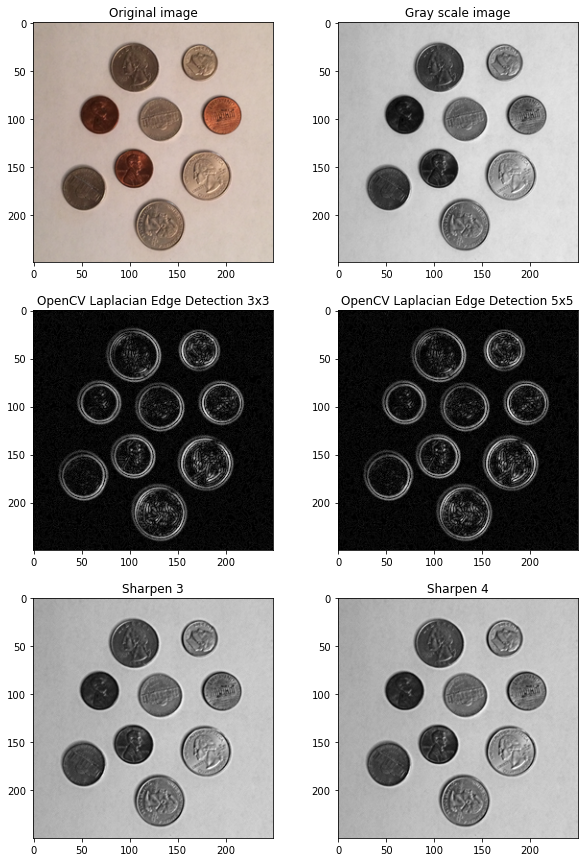

In [8]:
#Apply Laplacian operator with OpenCV Method
CVLap1 = cv2.Laplacian(blurred, cv2.CV_32F, 3)
CVLap2 = cv2.Laplacian(blurred, cv2.CV_32F, 5)

#Shapen image with edge
sharpen3 = sharp - CVLap1
sharpen4 = sharp - CVLap2

#Clip value to 0-255
sharpen3 = np.clip(sharpen3, 0, 255)
sharpen4 = np.clip(sharpen4, 0, 255)

#Transform to unsign integer 8 bit
CVLap1 = np.uint8(np.absolute(CVLap1))
CVLap2 = np.uint8(np.absolute(CVLap2))
sharpen3 = np.uint8(np.absolute(sharpen3))
sharpen4 = np.uint8(np.absolute(sharpen4))

#Plot image
fig = plt.figure(figsize=(10, 15))
##############ax1###################
ax1 = fig.add_subplot(3,2,1)
ax1.set(title='Original image')
ax1.imshow(image)
##############ax2###################
ax2 = fig.add_subplot(3,2,2)
ax2.set(title='Gray scale image')
ax2.imshow(gray, cmap='gray')
##############ax3###################
ax3 = fig.add_subplot(3,2,3)
ax3.set(title='OpenCV Laplacian Edge Detection 3x3')
ax3.imshow(CVLap1, cmap='gray')
#############ax4#####################
ax4 = fig.add_subplot(3,2,4)
ax4.set(title='OpenCV Laplacian Edge Detection 5x5')
ax4.imshow(CVLap2, cmap='gray')
##############ax5###################
ax5 = fig.add_subplot(3,2,5)
ax5.set(title='Sharpen 3')
ax5.imshow(sharpen3, cmap='gray')
#############ax6#####################
ax6 = fig.add_subplot(3,2,6)
ax6.set(title='Sharpen 4')
ax6.imshow(sharpen4, cmap='gray')